In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import os, shutil, glob
import math
import seaborn as sns; sns.set_style("white")
import gc

### Read data

In [2]:
BaseDir = 'Datasets'
sorted(os.listdir(BaseDir))

['.ipynb_checkpoints',
 'Features_5_percent_sample_Plate5.csv',
 'Features_images_MCR5_HCoV229_Plate5.csv',
 'Features_images_MRC5_HCoV229.csv',
 'qcRAW_images_MRC5_HCoV229_Plate1.csv',
 'qcRAW_images_MRC5_HCoV229_Plate2.csv',
 'qcRAW_images_MRC5_Plate3.csv',
 'qcRAW_images_MRC5_Plate4.csv']

In [3]:
Dataset = pd.read_csv('{}/Features_images_MCR5_HCoV229_Plate5.csv'.format(BaseDir), sep = ';', low_memory=False)
Dataset.shape

(432, 1283)

### Output directory

In [4]:
OutputDir = input("Enter name for output folder: ") # e.g.: Exp4-MRC5-bonus-CPwithAB2_Plots
if not os.path.exists(OutputDir): 
    os.makedirs(OutputDir)

Enter name for output folder:  Results


### PCA

In [5]:
Dataset.head(2)

,ImageID,AreaShape_Area_primobj,AreaShape_BoundingBoxArea_primobj,AreaShape_BoundingBoxMaximum_X_primobj,AreaShape_BoundingBoxMaximum_Y_primobj,AreaShape_BoundingBoxMinimum_X_primobj,AreaShape_BoundingBoxMinimum_Y_primobj,AreaShape_Center_X_primobj,AreaShape_Center_Y_primobj,AreaShape_CentralMoment_0_0_primobj,...,RadialDistribution_RadialCV_illumPHAandWGA_2of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_3of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_4of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_Overflow_quatobj,RadialDistribution_RadialCV_illumSYTO_1of4_quatobj,RadialDistribution_RadialCV_illumSYTO_2of4_quatobj,RadialDistribution_RadialCV_illumSYTO_3of4_quatobj,RadialDistribution_RadialCV_illumSYTO_4of4_quatobj,RadialDistribution_RadialCV_illumSYTO_Overflow_quatobj,Intensity_MeanIntensity_illumMITO_quatobj
0,B02_1,1630.863636,2278.590909,1111.218182,1058.754545,1061.354545,1012.672727,1085.888864,1035.270115,1630.863636,...,0.237924,0.009449,0.0,0.0,0.241886,0.243826,0.010695,0.0,0.0,0.004694
1,B02_2,1613.223301,2231.776699,1147.067961,1088.466019,1101.495146,1039.087379,1123.760475,1063.332261,1613.223301,...,0.268591,0.007455,0.0,0.0,0.213757,0.253531,0.009783,0.0,0.0,0.004825


In [6]:
x = Dataset.iloc[:, 1:-1].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

ImagePrincipalDf = pd.DataFrame(data = principalComponents)
ImagePrincipalDf.rename(columns={0: 'principal component 1', 1: 'principal component 2'}, inplace=True)
ImagePrincipalDf['Intensity_MeanIntensity_illumMITO_quatobj'] = Dataset['Intensity_MeanIntensity_illumMITO_quatobj']
ImagePrincipalDf['ImageID'] = Dataset['ImageID']
del x
gc.collect()
ImagePrincipalDf.head(2)

,principal component 1,principal component 2,Intensity_MeanIntensity_illumMITO_quatobj,ImageID
0,-29.851084,14.786986,0.004694,B02_1
1,-24.517013,8.227015,0.004825,B02_2


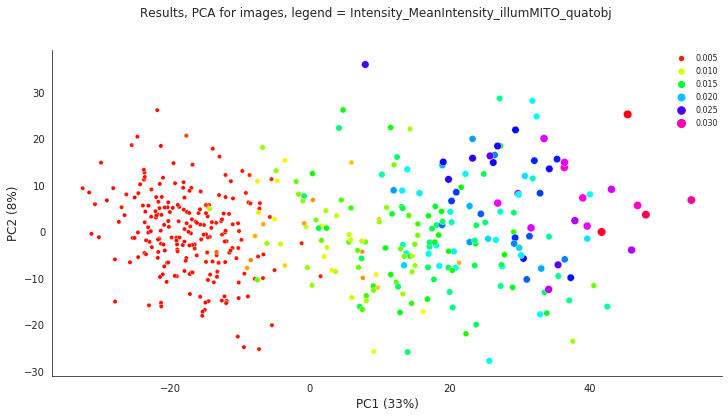

In [7]:
hue='Intensity_MeanIntensity_illumMITO_quatobj'
fig = plt.figure(figsize = (12,6))
fig.suptitle('{}, PCA for images, legend = {}'.format(OutputDir, hue), fontsize = 12)
ax = fig.add_subplot(111)
ax =sns.scatterplot(x='principal component 1', y='principal component 2', size='Intensity_MeanIntensity_illumMITO_quatobj',
              hue=hue, data=ImagePrincipalDf, palette='hsv',  s=1, alpha = 1, marker = 'o');
ax.legend(bbox_to_anchor = (1.00, 1),borderaxespad = 0, fontsize = 8, frameon = False)
ax.set_xlabel('PC1 ({}%)'.format (math.ceil(pca.explained_variance_ratio_[0]*100)), fontsize=12)
ax.set_ylabel('PC2 ({}%)'.format (math.ceil(pca.explained_variance_ratio_[1]*100)), fontsize=12)
sns.despine()
fig.savefig('{}/Image_PC1_PC2_hsv_{}.{}'.format(OutputDir, hue, 'pdf'),  dpi=300)